# 空间数据

首先运行以下命令，如果在自己的机器上运行，这有助于确保绘图出现在笔记本中。

In [1]:
%matplotlib inline

为了在 GIS 环境中工作，需要将真实世界的观察（可以在 2D 或 3D 空间中记录的对象或事件）简化为空间实体。这些空间实体可以在 GIS 中表示为向量（也称 矢量，即 vector）数据模型或光栅（raster）数据模型。

## 向量数据

向量特征可以分解为三种不同的几何原语：点（points）、折线（polylines）和多边形（polygons）。

### 点

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

d = {'name': ['Washington\n(38.90, -77.03)', 'Baltimore\n(39.29, -76.61)','Fredrick\n(39.41,-77.40)'], 
     'geometry': [Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)]}

gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
print(gdf)

                          name                    geometry
0  Washington\n(38.90, -77.03)  POINT (-77.03687 38.90719)
1   Baltimore\n(39.29, -76.61)  POINT (-76.61219 39.29039)
2     Fredrick\n(39.41,-77.40)  POINT (-77.40846 39.41201)


**点** 由坐标对组成，代表坐标系中的特定位置。点是最基本的几何基元，没有长度和面积。根据定义，点是看不见的，因为它没有面积；但是如果要映射这样的原语，这是不实际的。所以地图上的点是用既有面积又有形状的符号来表示的（如圆、方块、加号）。

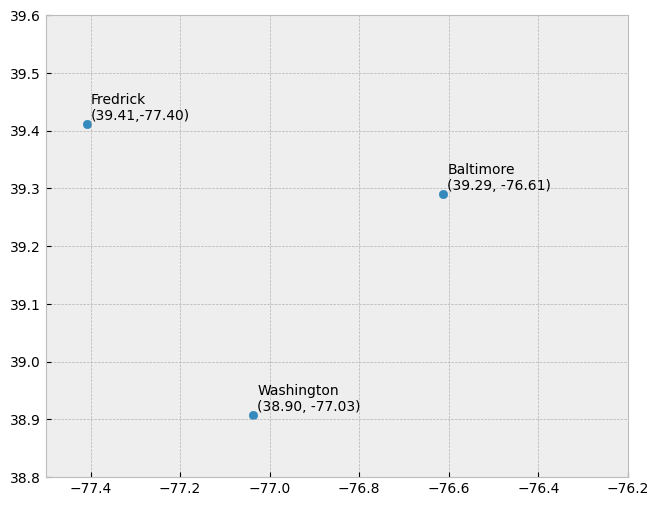

In [2]:
plt.style.use('bmh') # 更适合绘制几何图形。

fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax)
plt.ylim([38.8, 39.6])
plt.xlim([-77.5, -76.2])

for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
plt.show()

```{warning}
似乎能够将这些符号解释为点，但在某些情况下，这种解释可能是含糊不清的（例如，圆形符号描述的是地面上圆形特征的区域，如大型储油罐，还是表示该储油罐的点位置？）。
```

### 折线

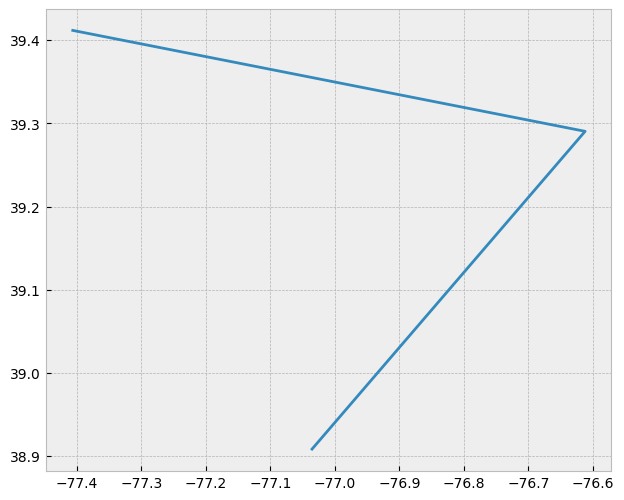

In [4]:
from shapely.geometry import LineString

d = {'name': ['Washington\n(38.90, -77.03)' ], 
     'geometry': [LineString([Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)])]}
gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax);

折线是由两个或多个被称为 **顶点** （vertex）的坐标对组成的序列。顶点是由坐标对定义的，就像点一样，但顶点与点的区别在于它与相邻顶点的显式定义关系。一个顶点至少连接到一个其他顶点。

像点一样，真正的线是看不见的，因为它没有面积。和点一样，线也可以用颜色、宽度和样式（如实线、虚线、虚线等）来表示。在 GIS 中，道路和河流通常以折线的形式存储。

### 多边形

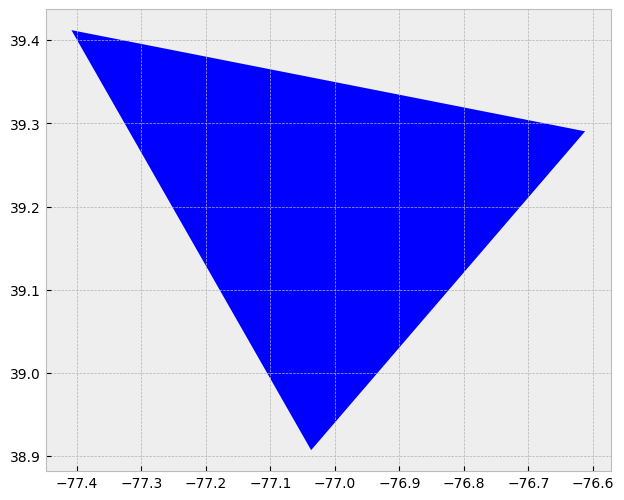

In [5]:
from shapely.geometry import Polygon

d = {'name': ['Washington\n(38.90, -77.03)' ], 
     'geometry': [Polygon([Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)])]}
gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax)
plt.show()

多边形由三条或三条以上的线段组成，线段的起始和结束坐标对相同。有时你会看到单词 lattice 或 area 来代替 'polygon'。多边形表示长度（即 area 的周长）和面积。它们也体现了内与外的概念；事实上，多边形所包围的区域是在 GIS 环境中明确定义的。如果不是，那么您使用的是折线特性。如果这看起来不直观，想象三条相连的线定义一个三角形：它们可以表示三条相连的道路段（因此是折线特征），或者它们可以表示被相连的道路包围的草地带（在这种情况下，“内部”是隐含的，因此定义了多边形）。

## 栅格数据

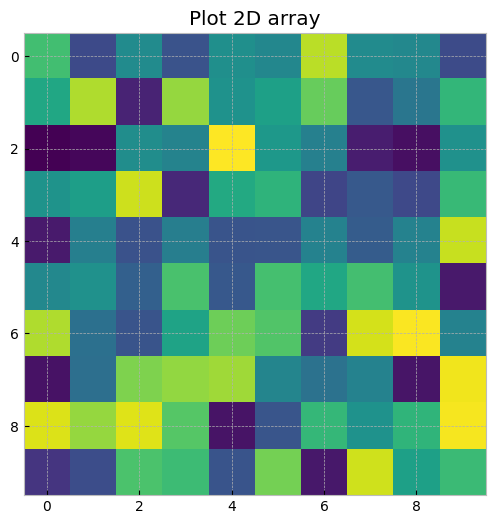

In [6]:
import numpy as np

X = np.random.randint(256, size=(10, 10))

fig = plt.figure(figsize=(8,6))
plt.imshow(X)
plt.title("Plot 2D array")
plt.show()

栅格（或者称为 光栅）数据模型使用单元格数组或像素来表示真实世界的对象。光栅数据集通常用于表示和管理图像、表面温度、数字高程模型和许多其他实体。

栅格可以被认为是区域对象的一种特殊情况，其中区域被划分为规则的单元格网格。但是，有规律间隔的标记点数组可能是更好的类比，因为栅格存储为值数组，其中每个单元格在大多数 GIS 环境中由单个坐标对定义。

在栅格数据模型中隐含着与每个单元格或像素相关的值。这与向量模型相反，向量模型可能具有或不具有与几何原语相关的值。

## 对象与域

我们世界的传统矢量/光栅视角是由软件和数据存储环境驱动的。但是如果您对分析模式感兴趣，那么这个视角并不是特别有用。事实上，它可以掩盖被研究实体的一些重要属性。对象 vs 场域的世界观被证明更有洞察力，即使它看起来更抽象。

### 对象视角

对象世界观将实体视为离散的对象；它们不必发生在研究区域内的每个位置。城市的点位置就是例子。城市区域的多边形表示也可能是不连续的。

### 域视图

世界的场视图将实体视为标量场（scalar field）。这是数学概念，其中标量是有大小的量。它可以在研究区域内的每个位置测量。标量场的两个常见例子是表面高程（surface elevation）和表面温度（surface temperature）。每个都代表可以在任何位置测量的属性。

标量场的另一个例子是建筑物的存在和不存在。这是二元标量，其中 $0$ 的值被分配给没有建筑的位置，$1$ 的值被分配给有一个或多个建筑的位置。建筑的场表示可能看起来并不直观，事实上，根据上一节中对世界的对象视角的定义，似乎只适合将建筑视为对象。事实上，建筑既可以被视为场，也可以被视为对象。分析的上下文最终决定了采用哪一种观点。如果对研究区域内建筑物的分布感兴趣，那么对其特征的对象视图是有意义的。另一方面，如果感兴趣的是确定所有不存在建筑的位置，那么这些实体的二元场视图就有意义。



### 尺度

选择如何表示真实世界的实体将在很大程度上取决于分析的比例尺（scale，也称为尺度或者规模）。在 GIS 中，比例尺有特定的含义：它是地图上的距离与现实世界中的距离的比率。所以大的比例尺地图意味着相对大的比例，从而较小的范围。这与外行人对大尺度的解释相反，大尺度关注的是研究的范围或程度；所以大尺度的分析就意味着大范围的分析。

```{note}
比如，在地理学中，某地区 $1:10\,000\,000$ 比例尺的地图，这被认为是小尺度的，而在外行人的术语中，这种程度通常被称为大尺度（即覆盖大面积）；$1:34\,000$ 比例尺地图，这被认为是大尺度，而在外行人的术语中，这种程度通常被称为小尺度（即覆盖小面积）。
```

### 属性表

与空间特征相关联的非空间信息被称为 **属性** （attribute）。GIS 地图上的特征通过唯一的数值特征标识符（numerical feature identifier，简称 FID）链接到属性表中的记录。层中的每个特征都有标识符。理解特征和属性记录之间的一对一或多对一关系是很重要的。由于地图上的特征与表中的记录相链接，许多 GIS 软件允许您单击地图上的特征，并在表中查看其相关属性。

光栅数据也只有在像素用一组唯一的整数值表示时才有属性。包含属性表的栅格数据集通常具有表示或定义类、组、类别或成员的单元格值。注：并非所有 GIS 栅格数据格式都能存储属性信息；事实上，大多数栅格数据集都没有属性表。

### 测量级别

属性数据可分为四个测量级别：

- **名义数据** （Nominal data）：没有隐含顺序、大小或量化的信息（例如铺设道路和未铺设道路）。
- **有序数据** （Ordinal data）：有隐含的顺序（例如，排名分数），然而，不能量化差异，因为线性尺度不隐含。
- **区间数据** （Interval data）是数值的，具有线性刻度（scale），但是它们没有真正的零，因此不能用来测量相对震级（magnitudes）。例如，人们不能说 $60°F$ 是 $30°F$ 的两倍，因为以 $°C$ 表示的温度值分别是 $15.5 °C$ 和 $-1.1°C$ （$15.5 °C$ 显然不是 $-1.1°C$ 的两倍）。
- 比率尺度数据（Ratio scale data）是具有真零（true zero）的区间数据，如货币价值（例如 $1, 20$、$100$ 美元）。

## 数据类型

另一种对属性进行分类的方法是根据其数据类型划分。ArcGIS 支持多种数据类型，如整数、浮点数、双精度和文本。了解您的数据类型和度量级别应该决定如何在 GIS 环境中存储它们。下表列出了大多数 GIS 应用程序中可用的流行数据类型。

类型|存储值|注解
:-|:-|:-
短整型（Short integer）|$[-32\,768, 32\,768]$|整数（Whole numbers）
长整型|$[-2\,147\,483\,648, 2\,147\,483\,648]$|整数
浮点数|$[-3.4 * E^{-38}, 1.2 * E^{38}]$|实数
双精度数|$[-2.2 * E^{-308}, 1.8 * E^{308}]$|实数
文本|最多 $64\,000$ 个字符|字母与单词



虽然整数可以存储为浮点数或双精度数（即可以将数字 $2$ 存储为 $2.0$），但这样做是有代价的：存储空间的增加。如果数据集很小，这可能不是什么大问题，但如果它由数万条记录组成，文件大小和处理时间的增加可能会成为问题。

虽然将整数值存储为浮点数可能不会产生可怕的后果，但将浮点数存储为整数就不能这样说了。例如，如果你的值由 $0.2,0.01,0.34,0.1$ 和 $0.876$ 组成，它们的整数对应物将是 $0,0,0$ 和 $1$ （即值四舍五入到最接近的整数）。